<a href="https://colab.research.google.com/github/Evans-colon/life_expectancy_project/blob/main/life_expectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install feature_engine
from feature_engine.imputation import MeanMedianImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




*Load the data

In [590]:
df = pd.read_csv("/content/sample_data/Life Expectancy Data.csv")
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


*View all of the attributes

In [591]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


*Check the data types of all of the attributes and also the total value counts.

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2927 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

*convert the features below to 'category' data types

In [593]:
df = df.astype({'Country' : 'category', 'Status': 'category'})

*rename the attributes for easy identification 

In [594]:
df = df.rename(columns = {'Country':'country', 'Year':'year', 'Status':'status', 'Life expectancy': 'life_expectancy', 'Adult Mortality':'adult_mortality', 'infant deaths':'infant_deaths', 'Alcohol':'alcohol', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'hepatitis_b', 'Measles':'measles','BMI':'bmi', 'under-five deaths':'under_five_deaths', 'Polio':'polio', 'Total expenditure':'total_expenditure', 'Diphtheria':'diphtheria', 'HIV/AIDS':'hiv/aids', 'GDP':'gdp', 'Population':'population', 'thinness  1-19 years':'thinness_1-19_years', 'thinness 5-9 years':'thinness_5-9_years', 'Income composition of resources':'income_composition_of_resources', 'Schooling':'schooling'}, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2938 non-null   category
 1   year                             2938 non-null   int64   
 2   status                           2938 non-null   category
 3   life_expectancy                  2927 non-null   float64 
 4   adult_mortality                  2928 non-null   float64 
 5   infant_deaths                    2938 non-null   int64   
 6   alcohol                          2744 non-null   float64 
 7   percentage_expenditure           2938 non-null   float64 
 8   hepatitis_b                      2385 non-null   float64 
 9   measles                          2938 non-null   int64   
 10  bmi                              2904 non-null   float64 
 11  under_five_deaths                2938 non-null   int64   
 12  polio 

*check for percentage of missing values for each attributes

In [595]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(),
                             'percentage_missing': df.isnull().sum()/2938 * 100})
missing_data

,total_missing,percentage_missing
country,0,0.000000
year,0,0.000000
status,0,0.000000
life_expectancy,11,0.374404
adult_mortality,10,0.340368
infant_deaths,0,0.000000
alcohol,194,6.603131
percentage_expenditure,0,0.000000
hepatitis_b,553,18.822328
measles,0,0.000000


*Fill the missing and null values with the median

In [596]:
median_imputer = MeanMedianImputer(imputation_method = 'median', variables=['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy'])
new_dataset = median_imputer.fit(df)
new_dataset = median_imputer.transform(df)
new_dataset.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


*Create a new feature 'total population' and also drop the features below

In [597]:
new_dataset['total_population'] = new_dataset['population'] - (new_dataset['adult_mortality'] + new_dataset['infant_deaths'])
new_dataset = new_dataset.drop(['adult_mortality', 'infant_deaths', 'population'], axis = 1)
new_dataset.head(2)

,country,year,status,life_expectancy,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,total_population
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,33736169.0
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,327247.0


*confirm that the cleaning has been effected

In [598]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2938 non-null   category
 1   year                             2938 non-null   int64   
 2   status                           2938 non-null   category
 3   life_expectancy                  2938 non-null   float64 
 4   alcohol                          2938 non-null   float64 
 5   percentage_expenditure           2938 non-null   float64 
 6   hepatitis_b                      2938 non-null   float64 
 7   measles                          2938 non-null   int64   
 8   bmi                              2938 non-null   float64 
 9   under_five_deaths                2938 non-null   int64   
 10  polio                            2938 non-null   float64 
 11  total_expenditure                2938 non-null   float64 
 12  diphth

*Use the five summary to understand the dataset; mean, standard deviation, minimum, 25%, median, 75% and maximum. This is to help us know the variability and distribution of our data points. Also informs the skewness of our data.

In [599]:
new_dataset.describe()

,year,life_expectancy,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,total_population
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03
mean,2007.518720,69.239959,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,4.821886,4.852144,0.630362,12.009837,1.023066e+07
std,4.613841,9.506447,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,4.397621,4.485854,0.205140,3.265139,5.402235e+07
min,2000.000000,36.300000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000,-8.600000e+01
25%,2004.000000,63.200000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,1.600000,1.600000,0.504250,10.300000,4.188930e+05
50%,2008.000000,72.100000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000,1.386399e+06
75%,2012.000000,75.600000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,7.100000,7.200000,0.772000,14.100000,4.584318e+06
max,2015.000000,89.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000,1.293858e+09


*Normalise our dataset for machine learning

In [600]:
new_dataset = new_dataset[['alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp','thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy']]
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(new_dataset), columns=new_dataset.columns)
df_norm.head()

,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy
0,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.619565,0.603509,0.505274,0.487923,0.544592
1,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.630435,0.610526,0.502110,0.483092,0.447818
2,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.637681,0.617544,0.495781,0.478261,0.447818
3,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.644928,0.628070,0.488397,0.473430,0.440228
4,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.655797,0.635088,0.478903,0.458937,0.434535


*split data into train, validation and test set and then fit to random forest for feature importance and selection

In [601]:
x = df_norm.drop(columns=['life_expectancy'], axis=1)
y = df_norm['life_expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45 )
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)
ran_forest = RandomForestRegressor(random_state=1, max_depth=4)
ran_forest.fit(df_norm, x)



RandomForestRegressor(max_depth=4, random_state=1)

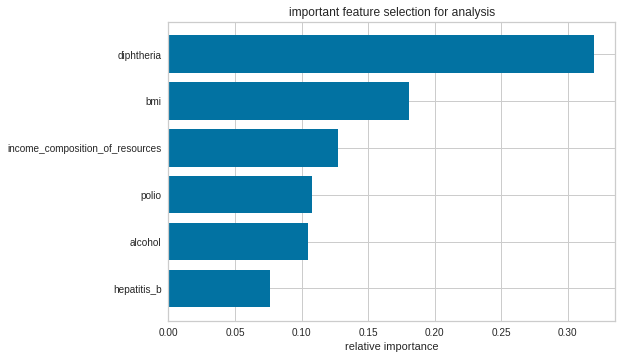

In [602]:
from numpy.core.numeric import indices
features = df_norm.columns
important_features = ran_forest.feature_importances_
indices = np.argsort(important_features)[-6:]
plt.title("important feature selection for analysis")
plt.barh(range(len(indices)), important_features[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("relative importance")
plt.show()


 *Fitting the regression against the validation datasets to check how the model can be able to learn from the data. Using the following models

 a. Linear regression

 b. Elastic Net

 c. Ridge
 
 d. Lasso

*Linear Regression

In [603]:
model = LinearRegression()
power_output = model.fit(x_val, y_val)

*Getting your R2 score

In [604]:
coef_deter = power_output.score(x_val, y_val)
coef_deter

0.7559532312163619

In [605]:
1 - (1-model.score(x_val, y_val)) * (len(y_val)-1)/(len(y_val)-x_val.shape[1]-1)

0.7495534033636442

*The score shows how the model was able to learn from the training dataset. it also shows variation of a dependent variable is being explained by the independent variable(s)

In [606]:
intercept = model.coef_
intercept

array([-7.52401478e-05,  5.00010996e-02, -7.32603314e-02, -1.96000457e-03,
        1.26382893e-01, -1.16738520e-01,  8.71199978e-02,  4.72282488e-02,
        9.23019376e-02, -6.28252467e-01,  1.48570283e-01, -1.19046917e-01,
        4.80277284e-02,  1.66115082e-01,  2.88748459e-01])

*The coefficient is measurement used to explain how much variability of our dependent variable can be explained by our independent variable

In [607]:
y_predict = power_output.predict(x_test)
y_train_predict = power_output.predict(x_train)

*Reporting RSquared score for the validation dataset LinearRegression and also the Error

In [608]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.06584042912832808
MSE :  0.0076700563793716
R2 score :  0.7397312943890013


*Elastic

In [609]:
model = ElasticNet()
power_output = model.fit(x_val, y_val)

*Getting R2 Score

In [610]:
coef_deter = power_output.score(x_val, y_val)
coef_deter

0.0

In [611]:
1 - (1-model.score(x_val, y_val)) * (len(y_val)-1)/(len(y_val)-x_val.shape[1]-1)

-0.02622377622377625

*The score shows how the model was able to learn from the training dataset. it also shows variation of a dependent variable is being explained by the independent variable(s)

In [612]:
intercept = model.coef_
intercept

array([ 0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
        0.,  0.])

*The coefficient is measurement used to explain how much variability of our dependent variable can be explained by our independent variable

In [613]:
y_predict = power_output.predict(x_test)
y_train_predict = power_output.predict(x_train)

*Reporting RSquared score for the validation dataset LinearRegression and also the Error

In [614]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.13764096817133697
MSE :  0.029582278738108925
R2 score :  -0.0038180966829053364


*Ridge

In [615]:
model = Ridge()
power_output = model.fit(x_val, y_val)

In [616]:
coef_deter = power_output.score(x_val, y_val)
coef_deter

0.7528419181352844

In [617]:
1 - (1-model.score(x_val, y_val)) * (len(y_val)-1)/(len(y_val)-x_val.shape[1]-1)

0.7463604999045664

In [618]:
intercept = model.coef_
intercept

array([-0.00157711,  0.07508542, -0.06542408, -0.01761888,  0.12970215,
       -0.06175988,  0.08711486,  0.0371067 ,  0.09735759, -0.52390329,
        0.1177544 , -0.09740918, -0.00433971,  0.18276487,  0.25823099])

In [619]:
y_predict = power_output.predict(x_test)
y_train_predict = power_output.predict(x_train)

*Error score

In [620]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.06666479015315542
MSE :  0.007773714059038507
R2 score :  0.7362138691212936


*Lasso

In [621]:
model = Ridge()
power_output = model.fit(x_val, y_val)

In [622]:
coef_deter = power_output.score(x_val, y_val)
coef_deter

0.7528419181352844

In [623]:
1 - (1-model.score(x_val, y_val)) * (len(y_val)-1)/(len(y_val)-x_val.shape[1]-1)

0.7463604999045664

In [624]:
intercept = model.coef_
intercept

array([-0.00157711,  0.07508542, -0.06542408, -0.01761888,  0.12970215,
       -0.06175988,  0.08711486,  0.0371067 ,  0.09735759, -0.52390329,
        0.1177544 , -0.09740918, -0.00433971,  0.18276487,  0.25823099])

In [625]:
y_predict = power_output.predict(x_test)
y_train_predict = power_output.predict(x_train)

In [626]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.06666479015315542
MSE :  0.007773714059038507
R2 score :  0.7362138691212936


*Hyper-parametric tuning

In [627]:
train_score = []
test_score = []

random_state = 10

for i in range(random_state):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_val, y_val, test_size = 0.30, random_state = i)

    linear_model_1 = LinearRegression()
    linear_model_1.fit(x_train1, y_train1)
    
    y_train_predict_mimax = linear_model_1.predict(x_train1)
    y_test_predict_minmax = linear_model_1.predict(x_test1)
    
    train_score = np.append(train_score, r2_score(y_train1, y_train_predict_mimax))
    test_score = np.append(test_score, r2_score(y_test1, y_test_predict_minmax))

print(x_train1.shape)
print(y_train1.shape)

(411, 15)
(411,)


In [628]:
train_score

array([0.78492673, 0.76205748, 0.74550209, 0.79121303, 0.74555312,
       0.74991646, 0.77623654, 0.77701163, 0.74587104, 0.74047112])

In [629]:
test_score

array([0.66638145, 0.72884324, 0.76506827, 0.67087986, 0.76303127,
       0.75666913, 0.70356547, 0.67959416, 0.73379722, 0.7657167 ])

In [630]:
print('R2 train: %.2f +/- %.2f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.76 +/- 0.02


In [631]:
print('R2 train: %.2f +/- %.2f' % (np.mean(test_score),np.std(test_score)))

R2 train: 0.72 +/- 0.04


*Hyperparameters tuning are parameters estimates which improves the result of the linear regression model (Eg: increasing the percentage of train set/test set) and the variables which determine how the model is being trained Hyperparameters are set before training.**

*Train the model with the best amongst the above and the best is LinearRegression

In [632]:
model = LinearRegression()
power_output = model.fit(x_train, y_train)

In [633]:
coef_deter = power_output.score(x_train, y_train)
coef_deter

0.7749590600209252

In [634]:
intercept = model.coef_
intercept

array([ 0.02663244,  0.02597358, -0.02360969, -0.07820546,  0.07770833,
       -0.01592328,  0.05919325,  0.03321116,  0.08471915, -0.68422001,
        0.12001851, -0.01615776, -0.02545921,  0.14443553,  0.33969732])

In [635]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.06666479015315542
MSE :  0.007773714059038507
R2 score :  0.7362138691212936
